# Evaluation de la fréquence de mise à jour

On s'intéresse à la stabilité de notre algorithme pour déterminer les dates de maintenance de ce dernier.

Afin d'évaluer la fréquence de mise à jour nécessaire pour maitenir la stabilité de clusters, nous allons étudier les données d'une manière chronologique. La procédure la plus juste consisterais à étudier les commandes dans l'ordre qu'elles arrivent.

## Préparation du jeu de données

In [387]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

In [388]:
data = pd.read_csv("C:/Users/lenovo/Olist/data_short.csv")
data.head()

,customer_unique_id,customer_city,index,Recency,Frequency,MonetaryValue,r_quartile,f_bins,m_quartile,RFM_Score,distance_customer_seller,product_category_name,nb_days_before_delivered,review_score
0,000e309254ab1fc5ba99dd469d36bdb4,valparaiso de goias,19,115,2,39.210,1,2,4,124,497.666327,fashion_underwear_beach,14.0,3.0
1,0028a7d8db7b0247652509358ad8d755,valinhos,55,309,2,177.435,3,2,1,321,363.245845,office_furniture,23.0,3.0
2,00324c9f4d710e7bac5c5ba679714430,paraiso do tocantins,73,483,2,54.890,4,2,4,424,1480.276994,housewares,12.0,5.0
3,00986cafefb6e670cceca01694bda599,pedreira,232,290,2,33.455,3,2,4,324,779.771352,stationery,11.0,4.0
4,00a9fd000ff87bb48b989df819c418f5,rio de janeiro,254,212,4,64.850,2,2,3,223,1110.099214,cool_stuff,6.0,5.0


In [389]:
df = pd.read_csv("C:/Users/lenovo/Olist/df.csv")

In [390]:
col_drop = ['Unnamed: 0','customer_id', 'customer_city',
       'customer_latitude','customer_longitude','order_id','order_status',
        'order_approved_at',
       'order_delivered_carrier_date','order_delivered_customer_date',
       'order_estimated_delivery_date', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value']

In [391]:
df.drop(col_drop, axis=1, inplace=True)

In [392]:
data_stab = pd.merge(data, df, left_on="customer_unique_id",
              right_on="customer_unique_id", how="left")

In [393]:
data_stab=data_stab.drop_duplicates()

<AxesSubplot:>

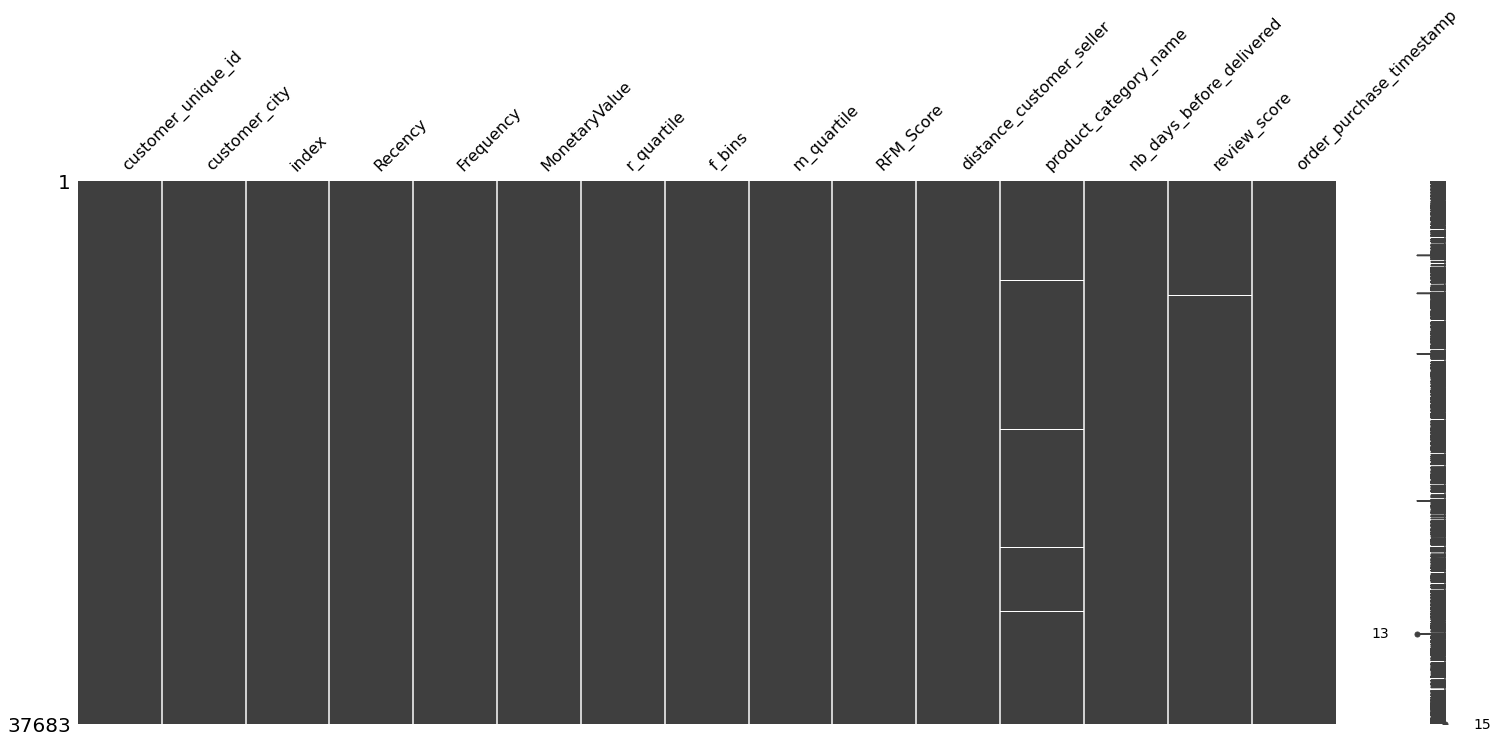

In [394]:
msno.matrix(data_stab)

In [395]:
data_stability = pd.DataFrame()
data_stability["customer_unique_id"] = data_stab["customer_unique_id"]
data_stability["Recency"] = data_stab["Recency"]
data_stability["Frequency"] = data_stab["Frequency"]
data_stability["MonetaryValue"] = data_stab["MonetaryValue"]
data_stability["nb_days_before_delivered"] = data_stab["nb_days_before_delivered"]
data_stability["distance_customer_seller"] = data_stab["distance_customer_seller"]
data_stability["order_purchase_timestamp"] = data_stab["order_purchase_timestamp"]
#data_stability.set_index("customer_unique_id", inplace=True)

In [396]:
data_stability.head()

,customer_unique_id,Recency,Frequency,MonetaryValue,nb_days_before_delivered,distance_customer_seller,order_purchase_timestamp
0,000e309254ab1fc5ba99dd469d36bdb4,115,2,39.210,14.0,497.666327,2018-06-25 09:53:57
2,0028a7d8db7b0247652509358ad8d755,309,2,177.435,23.0,363.245845,2017-12-13 15:49:39
4,00324c9f4d710e7bac5c5ba679714430,483,2,54.890,12.0,1480.276994,2017-06-21 20:40:38
6,00986cafefb6e670cceca01694bda599,290,2,33.455,11.0,779.771352,2017-12-31 17:55:07
8,00a9fd000ff87bb48b989df819c418f5,212,4,64.850,6.0,1110.099214,2018-03-20 07:08:27


In [397]:
data_stability.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37683 entries, 0 to 41660
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_unique_id        37683 non-null  object 
 1   Recency                   37683 non-null  int64  
 2   Frequency                 37683 non-null  int64  
 3   MonetaryValue             37683 non-null  float64
 4   nb_days_before_delivered  37683 non-null  float64
 5   distance_customer_seller  37683 non-null  float64
 6   order_purchase_timestamp  37683 non-null  object 
dtypes: float64(3), int64(2), object(2)
memory usage: 2.3+ MB


In [398]:
data_stability=data_stability.reset_index(drop=True)



In [399]:
data_stability.shape

(37683, 7)

In [400]:
list_categories_1, list_categories_2 = [], []
for txt in data_stability["order_purchase_timestamp"]:
    
        list_categories_1.append(txt.split("-")[0])
        list_categories_2.append(txt.split("-")[1])

In [401]:
data_stability["année"] = pd.Series(list_categories_1)
data_stability["mois"] = pd.Series(list_categories_2)

In [402]:
data_stability=data_stability.sort_values(by = ['année', 'mois'], ascending = [True, False]) #: tri par ordre décroissant.
data_stability['année'] = data_stability['année'].astype(int)
data_stability['mois'] = data_stability['mois'].astype(int)
data_stability_2017 = data_stability[data_stability['année']==2017]
data_stability_2017=data_stability_2017.sort_values(by = 'mois', ascending = True)

In [ ]:
2017 + janvier 2018
puis 2017 + janvier 2018 + février 2018
puis 2017 + janvier 2018 + mars 2018
puis 2017 + janvier 2018 + Avril 2018
puis 2017 + janvier 2018 + Mai 2018
puis 2017 + janvier 2018 + juin 2018


In [367]:
data_stability_2017

,customer_unique_id,Recency,Frequency,MonetaryValue,nb_days_before_delivered,distance_customer_seller,order_purchase_timestamp,année,mois
37645,765369a23b18f4f6dfce1757448fbae0,644,1,131.350,9.0,104.063586,2017-01-11 19:21:04,2017,1
14692,5045da01402baca564e8d4fe5f74a968,630,1,156.580,8.0,729.529332,2017-01-26 00:16:29,2017,1
14663,28b532ed2ae560bc90687b4d466d458b,627,1,102.800,6.0,405.742490,2017-01-28 17:57:35,2017,1
14564,e51eaffb93507fb621df4131e0454edd,626,1,207.900,15.0,961.185526,2017-01-30 14:51:21,2017,1
14461,2c92b3c621adddeae929cb98870dd6d2,635,1,51.640,9.0,352.468728,2017-01-20 22:18:06,2017,1
...,...,...,...,...,...,...,...,...,...
24830,726533e4185c25f2b73d0c52f90f9024,320,1,255.360,13.0,503.742327,2017-12-01 23:29:16,2017,12
24845,4edd24fa1c0212d8ce769eea27aa1855,311,1,464.980,25.0,2905.705080,2017-12-11 11:42:43,2017,12
24867,62a36e9a94e5828fec5f6964f740718d,308,1,60.000,18.0,923.123109,2017-12-14 17:13:04,2017,12
24635,f085d32f56ff8cd1c24ea9eb43ec9edc,316,1,1135.890,1.0,106.018600,2017-12-06 13:56:13,2017,12


In [384]:
data_stability_mois_2018_1 = data_stability[(data_stability['année'] == 2018) & (data_stability['mois']== 1)]
data_stability_mois_2018_2 = data_stability[(data_stability['année'] == 2018) & (data_stability['mois']== 2)]
data_stability_mois_2018_3 = data_stability[(data_stability['année'] == 2018) & (data_stability['mois']== 3)]
data_stability_mois_2018_4 = data_stability[(data_stability['année'] == 2018) & (data_stability['mois']== 4)]
data_stability_mois_2018_5 = data_stability[(data_stability['année'] == 2018) & (data_stability['mois']== 5)]
data_stability_mois_2018_6 = data_stability[(data_stability['année'] == 2018) & (data_stability['mois']== 6)]


In [385]:
data_stability_mois_1 = pd.concat([data_stability_2017, data_stability_mois_2018_1])
data_stability_mois_2 = pd.concat([data_stability_mois_1, data_stability_mois_2018_2])
data_stability_mois_3 = pd.concat([data_stability_mois_2, data_stability_mois_2018_3])
data_stability_mois_4 = pd.concat([data_stability_mois_3, data_stability_mois_2018_4])
data_stability_mois_5 = pd.concat([data_stability_mois_4, data_stability_mois_2018_5])
data_stability_mois_6 = pd.concat([data_stability_mois_5, data_stability_mois_2018_6])


In [ ]:
col_drop_2017 = ['order_purchase_timestamp', 'année', 'mois']
data_stability_2017.drop(col_drop_2017 , axis=1, inplace=True)
data_stability_2017.set_index("customer_unique_id", inplace=True)
data_stability_mois_1.drop(col_drop_2017 , axis=1, inplace=True)
data_stability_mois_1.set_index("customer_unique_id", inplace=True)
data_stability_mois_2.drop(col_drop_2017 , axis=1, inplace=True)
data_stability_mois_2.set_index("customer_unique_id", inplace=True)
data_stability_mois_3.drop(col_drop_2017 , axis=1, inplace=True)
data_stability_mois_3.set_index("customer_unique_id", inplace=True)
data_stability_mois_4.drop(col_drop_2017 , axis=1, inplace=True)
data_stability_mois_4.set_index("customer_unique_id", inplace=True)
data_stability_mois_5.drop(col_drop_2017 , axis=1, inplace=True)
data_stability_mois_5.set_index("customer_unique_id", inplace=True)
data_stability_mois_6.drop(col_drop_2017 , axis=1, inplace=True)
data_stability_mois_6.set_index("customer_unique_id", inplace=True)

In [375]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4, random_state=42)

label_true = model.fit_predict(data_stability_2017)


In [380]:
#model1
model_1 = model.fit(data_stability_mois_1)
lebel_mois_1 = model_1.predict(data_stability_2017)
#model2
model_2 = model.fit(data_stability_mois_2)
lebel_mois_2 = model_2.predict(data_stability_2017)
#model3
model_3 = model.fit(data_stability_mois_3)
lebel_mois_3 = model_3.predict(data_stability_2017)
#model4
model_4 = model.fit(data_stability_mois_4)
lebel_mois_4 = model_4.predict(data_stability_2017)
#model5
model_5 = model.fit(data_stability_mois_5)
lebel_mois_5 = model_5.predict(data_stability_2017)
#model6
model_6 = model.fit(data_stability_mois_6)
lebel_mois_6 = model_6.predict(data_stability_2017)


In [382]:
from sklearn.metrics import adjusted_rand_score

print("ARI à 1 mois :", \
      adjusted_rand_score(label_true , \
                          lebel_mois_1))
print("ARI à 2 mois :", \
      adjusted_rand_score(label_true , \
                          lebel_mois_2))
print("ARI à 3 mois :", \
      adjusted_rand_score(label_true , \
                          lebel_mois_3))
print("ARI à 4 mois :", \
      adjusted_rand_score(label_true , \
                          lebel_mois_4))
print("ARI à 5 mois :", \
      adjusted_rand_score(label_true , \
                          lebel_mois_5))
print("ARI à 6 mois :", \
      adjusted_rand_score(label_true , \
                          lebel_mois_6))

ARI à 1 mois : 0.9833566424014306
ARI à 2 mois : 0.9818831451869484
ARI à 3 mois : 0.4272196334896431
ARI à 4 mois : 0.4321864010850646
ARI à 5 mois : 0.43079495856075734
ARI à 6 mois : 0.4314602234000591


In [348]:
liste_ARI = [adjusted_rand_score(label_true,lebel_mois_1),adjusted_rand_score(label_true,lebel_mois_2),adjusted_rand_score(label_true,lebel_mois_3),adjusted_rand_score(label_true,lebel_mois_4),adjusted_rand_score(label_true,lebel_mois_5),adjusted_rand_score(label_true,lebel_mois_6)]

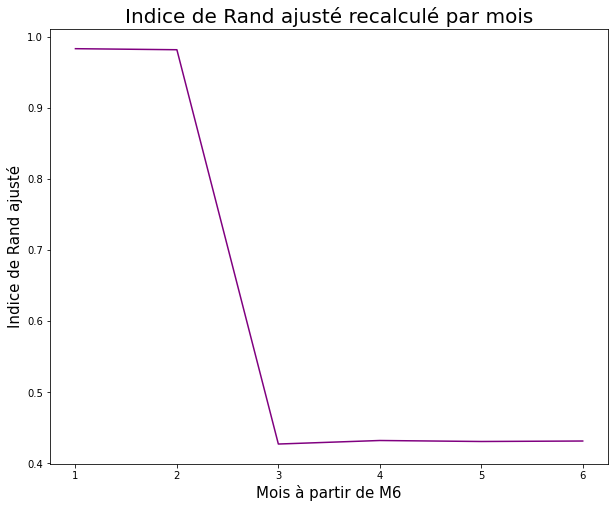

In [349]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Mois à partir de M6', fontsize=15)
ax.set_ylabel('Indice de Rand ajusté', fontsize=15)
ax.set_title('Indice de Rand ajusté recalculé par mois', fontsize=20)

plt.plot(range(1,7), liste_ARI, color="purple")

L'indice de Rand devient instable avec une tendance à diminuer à partir de mois 3. La maintenance est donc recommandée au moins tous les 3 mois. 

In [414]:
from datetime import datetime, timedelta

In [417]:
timedelta(days=1)

datetime.timedelta(days=1)